# Digit Recognizer using Convolutional Neural Network 2D

Kaggle Competition: https://www.kaggle.com/c/digit-recognizer

In [114]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import ELU
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import pandas as pd

%matplotlib inline

<font size=3>**Load digits dataset**</font>

In [115]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print("train_data shape: ", train_data.shape)
print("test_data shape: ", test_data.shape)

train_data shape:  (42000, 785)
test_data shape:  (28000, 784)


<font size=3>**Split train/test data and labels**</font>

In [116]:
X_train = train_data.drop(['label'], axis=1)
print("X_train shape: ", X_train.shape)

print("Size of first train sample: ", X_train.loc[0,:].shape)
# print("Size of first train sample: ", X_train.values.shape)
########################
y_train = train_data['label']
print("\ny_train shape: ", y_train.shape)

########################
X_test = test_data
print("\nX_train shape: ", X_test.shape)

print("Size of first test sample: ", X_test.loc[0,:].shape)
# print("Size of first test sample: ", X_test.values.shape)

X_train shape:  (42000, 784)
Size of first train sample:  (784,)

y_train shape:  (42000,)

X_train shape:  (28000, 784)
Size of first test sample:  (784,)


<font size=3>**Reshape data**</font>

In [117]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print ("X_train reshaped: ", X_train.shape)
print ("X_test reshaped: ", X_test.shape)

X_train reshaped:  (42000, 28, 28, 1)
X_test reshaped:  (28000, 28, 28, 1)


<font size=3>**Display one handwritten sample**</font>

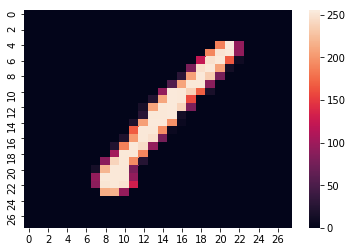

In [118]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.heatmap(X_train[0][:,:,0])

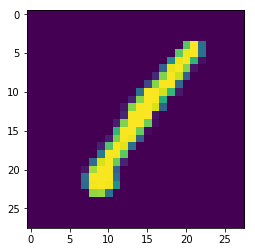

In [119]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0][:,:,0])

<font size=3>**Mean normalize dataset**</font>

In [120]:
X_train_mean = np.mean(X_train, axis=0)
X_test_mean = np.mean(X_test, axis=0)

X_train = (X_train-X_train_mean)/255
X_test = (X_test-X_test_mean)/255

<font size=3>**Convert 1-dimensional class arrays to 10-dimensional class matrices**</font>

Using to_categorical

In [121]:
#Y_train = np_utils.to_categorical(y_train, 10)

#print (Y_train[0])

Using LabelBinarizer

In [122]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
lb.fit([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Y_train = lb.transform(y_train)

print(Y_train.shape)
print (Y_train[0])

(42000, 10)
[0 1 0 0 0 0 0 0 0 0]


<font size=3>**Define model architecture**</font>

In [127]:
model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
#model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
#model.add(ELU(alpha=1.0))
model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3)))
#model.add(ELU(alpha=1.0))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dense(128))
#model.add(ELU(alpha=1.0))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

<font size=3>**Compile model**</font>

In [124]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

<font size=3>**Fit model using training data**</font>

In [125]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1)

Epoch 1/10
42000/42000 [==============================] - 180s 4ms/step - loss: 0.2537 - acc: 0.9236
Epoch 2/10
42000/42000 [==============================] - 177s 4ms/step - loss: 0.0950 - acc: 0.9718
Epoch 3/10
42000/42000 [==============================] - 177s 4ms/step - loss: 0.0721 - acc: 0.9780
Epoch 4/10
42000/42000 [==============================] - 179s 4ms/step - loss: 0.0610 - acc: 0.9814
Epoch 5/10
42000/42000 [==============================] - 177s 4ms/step - loss: 0.0519 - acc: 0.9843
Epoch 6/10
42000/42000 [==============================] - 178s 4ms/step - loss: 0.0452 - acc: 0.9864
Epoch 7/10
42000/42000 [==============================] - 177s 4ms/step - loss: 0.0413 - acc: 0.9868
Epoch 8/10
42000/42000 [==============================] - 175s 4ms/step - loss: 0.0372 - acc: 0.9883
Epoch 9/10
42000/42000 [==============================] - 174s 4ms/step - loss: 0.0318 - acc: 0.9894
Epoch 10/10
42000/42000 [==============================] - 174s 4ms/step - loss: 0.0308 - a

<font size=3>**Predict test data**</font>

In [126]:
pred = model.predict(X_test, verbose=1)
print("Prediction: ", pred)

28000/28000 [==============================] - 34s 1ms/step
Prediction:  [[1.4708214e-10 2.7373899e-13 1.0000000e+00 ... 5.0259675e-12
  4.0031718e-11 4.1553080e-12]
 [1.0000000e+00 1.2095946e-14 6.8475328e-09 ... 1.2439276e-10
  6.1063758e-12 1.7627215e-10]
 [5.7015102e-14 1.5872958e-13 1.3060071e-10 ... 2.8188765e-09
  8.7130815e-08 9.9997556e-01]
 ...
 [7.6286191e-21 2.9402696e-14 2.8426751e-13 ... 9.3206743e-15
  2.8383313e-12 5.4860561e-11]
 [8.7333266e-12 4.6345002e-13 1.6951433e-11 ... 2.5264297e-08
  2.2613621e-08 9.9997711e-01]
 [5.6116299e-13 1.6529775e-16 1.0000000e+00 ... 1.2211708e-15
  4.8549054e-09 9.3055847e-13]]


Train accuracy using ELU: 98.19%

Train accuracy using ReLU: 98.98%

<font size=3>**Finding the maximum probability**</font>

In [138]:
maxProb = np.argmax(pred, axis = 1)
maxProb = pd.Series(maxProb, name="Label")

<font size=3>**Creating a CSV file for prediction**</font>

In [139]:
output = pd.concat([pd.Series(range(1,28001),name = "ImageId"), maxProb], axis = 1)
output.to_csv("submission.csv",index=False)